In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


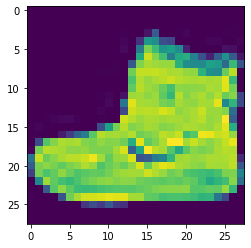

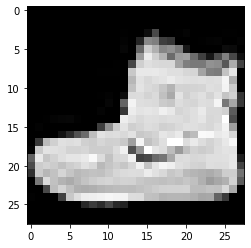

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

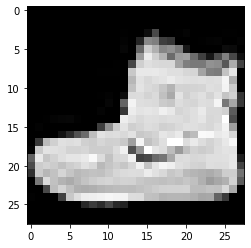

In [7]:
x_train = x_train/255
x_test = x_test/255
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [8]:
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[1], y_test[1])

0 2


In [10]:
import numpy as np

x_trainr = np.array(x_train).reshape(60000, 28, 28, 1)
x_testr = np.array(x_test).reshape(10000, 28, 28, 1)

print("Training sample dimention: ", x_trainr.shape)
print("Testing sample dimention: ", x_testr.shape)

Training sample dimention:  (60000, 28, 28, 1)
Testing sample dimention:  (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

# Model Create

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
fmnist_model_checkpoint = ModelCheckpoint('FMNIST_Weight.h5',
                                   save_best_only=True,
                                   monitor='loss',
                                   verbose=1                            
                                   )

In [13]:
model = Sequential()

In [14]:
# 1st Layer
model.add(Conv2D(64, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(rate=0.1))
# 2nd Layer
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.1))
# 3rd Layer
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(rate=0.1))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        9232      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0

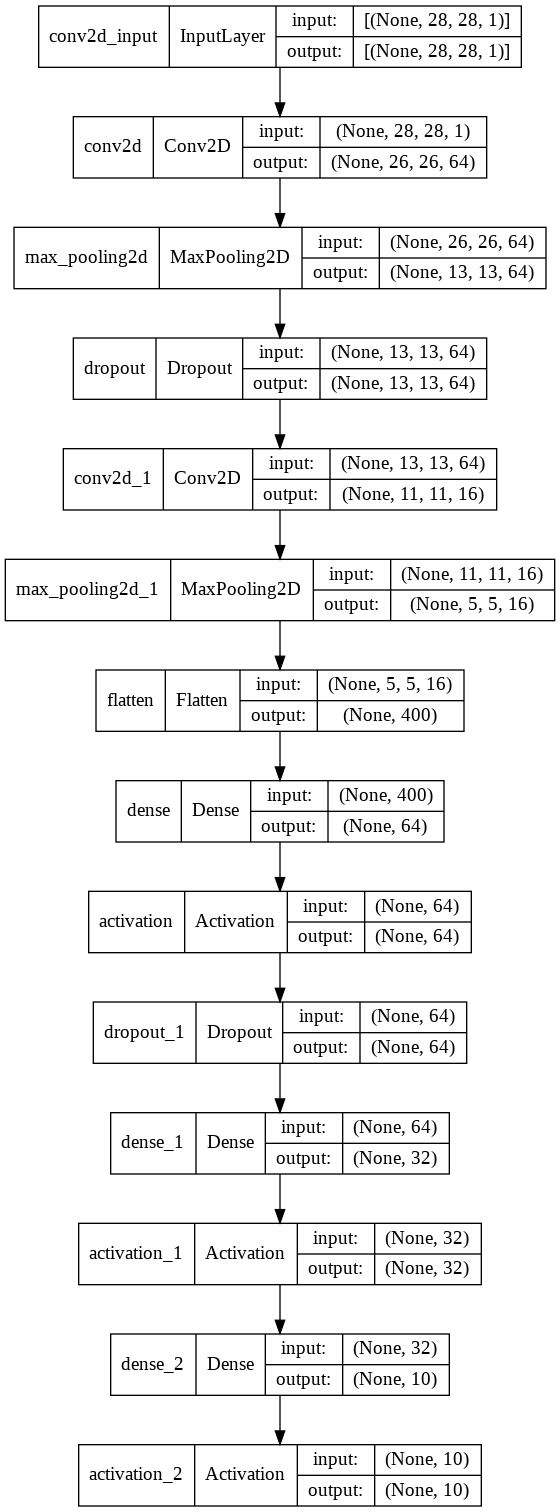

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [17]:
print("Total training sample: ", len(x_trainr))

Total training sample:  60000


In [18]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_trainr, y_train, batch_size=512, epochs=100, validation_split = 0.3, callbacks=[fmnist_model_checkpoint])

Epoch 1/100
83/83 [==============================] - ETA: 0s - loss: 1.1652 - accuracy: 0.5737
Epoch 00001: loss improved from inf to 1.16517, saving model to FMNIST_Weight.h5
83/83 [==============================] - 17s 21ms/step - loss: 1.1652 - accuracy: 0.5737 - val_loss: 0.6290 - val_accuracy: 0.7646
Epoch 2/100
82/83 [============================>.] - ETA: 0s - loss: 0.6091 - accuracy: 0.7697
Epoch 00002: loss improved from 1.16517 to 0.60909, saving model to FMNIST_Weight.h5
83/83 [==============================] - 1s 16ms/step - loss: 0.6091 - accuracy: 0.7697 - val_loss: 0.5407 - val_accuracy: 0.7950
Epoch 3/100
81/83 [============================>.] - ETA: 0s - loss: 0.5213 - accuracy: 0.8061
Epoch 00003: loss improved from 0.60909 to 0.52070, saving model to FMNIST_Weight.h5
83/83 [==============================] - 1s 18ms/step - loss: 0.5207 - accuracy: 0.8061 - val_loss: 0.4645 - val_accuracy: 0.8278
Epoch 4/100
81/83 [============================>.] - ETA: 0s - loss: 0.46

In [20]:
import os.path
if os.path.isfile("/content/FMNIST_Weight.h5") is False:
    model.save_weights("/content/FMNIST_Weight.h5")

In [21]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3191 - accuracy: 0.9054
Loss:  0.3191052973270416
Accuracy:  0.9053999781608582


In [22]:
predictions = model.predict([x_testr])

In [23]:
print(predictions)

[[6.33567157e-11 5.41424327e-13 2.98562286e-10 ... 3.34859624e-06
  2.53699123e-12 9.99996662e-01]
 [7.25159308e-11 1.79561100e-22 9.99998808e-01 ... 2.37812415e-24
  3.71594243e-15 3.57003010e-23]
 [6.18690670e-19 1.00000000e+00 2.07815865e-25 ... 1.47642933e-28
  1.05599965e-25 2.94077177e-27]
 ...
 [4.85646289e-12 7.21230174e-15 5.09109729e-14 ... 3.17227364e-13
  1.00000000e+00 2.00905644e-17]
 [1.15037035e-10 1.00000000e+00 1.62806698e-13 ... 3.97043518e-15
  5.28763409e-15 2.22555620e-15]
 [3.71262239e-08 3.03794455e-11 1.25323723e-07 ... 1.22356942e-04
  1.66767973e-06 2.48970498e-08]]


In [24]:
pred = np.argmax(predictions[1])

In [25]:
print(pred)

2


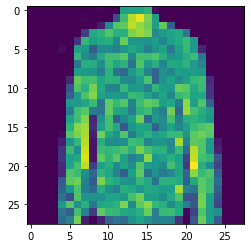

In [26]:
plt.imshow(x_test[101])

In [27]:
image_class = {}
image_class[0] = 'T-shirt/top'
image_class[1] = 'Trouser'
image_class[2] = 'Pullover'
image_class[3] = 'Dress'
image_class[4] = 'Coat'
image_class[5] = 'Sandal'
image_class[6] = 'Shirt'
image_class[7] = 'Sneaker'
image_class[8] = 'Bag'
image_class[9] = 'Ankle boot'

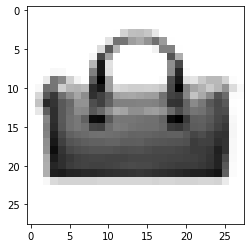

Prediction:  Bag


In [28]:
from PIL import Image

# for i in range(10):
demo_image = "/content/drive/MyDrive/University/12th Semester/CSI 416 [Pattern Recognition Lab]/Project/raw_images/fashion/bag.jpg"
img = Image.open(demo_image)


img = img.resize((28, 28))
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')

image_array = np.array(imgGray)

plt.imshow(imgGray, cmap=plt.get_cmap('gray'))
plt.show()

image_array = image_array/255

new_img = np.array(image_array).reshape(1, 28, 28, 1)    # reshape for kerner operation

test_pred = model.predict(new_img)

predict_class = np.argmax(test_pred)
print("Prediction: ", image_class[predict_class])

```
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
```

In [29]:
print(len(test_pred[0]))
for i in range(10):
    print(f"Similarity with {image_class[i]} is --> [{round(test_pred[0][i]*100, 4)} %]")

10
Similarity with T-shirt/top is --> [0.5728 %]
Similarity with Trouser is --> [0.0 %]
Similarity with Pullover is --> [0.044 %]
Similarity with Dress is --> [0.0191 %]
Similarity with Coat is --> [0.0001 %]
Similarity with Sandal is --> [0.0211 %]
Similarity with Shirt is --> [0.0952 %]
Similarity with Sneaker is --> [0.007 %]
Similarity with Bag is --> [98.9009 %]
Similarity with Ankle boot is --> [0.3397 %]


In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test/255
x_trainr = np.array(x_train).reshape(60000, 28, 28, 1)
x_testr = np.array(x_test).reshape(10000, 28, 28, 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

# Use Model Explicitely

In [48]:
model2 = Sequential()

In [49]:
# 1st Layer
model2.add(Conv2D(64, (3,3), input_shape = (28,28,1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
# 2nd Layer
# model2.add(Conv2D(32, (3,3), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(rate=0.1))
# 3rd Layer
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dropout(rate=0.1))

model2.add(Dense(32))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))

In [50]:
model2.load_weights("/content/FMNIST_Weight.h5")
# model2.get_weights()

In [51]:
model2.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
test2_loss, test2_acc = model2.evaluate(x_testr, y_test)
print("Loss: ", test2_loss)
print("Accuracy: ", test2_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3191 - accuracy: 0.9054
Loss:  0.3191052973270416
Accuracy:  0.9053999781608582


In [53]:
predictions2 = model2.predict([x_testr])

In [54]:
print(predictions2)

[[6.33567157e-11 5.41424327e-13 2.98562286e-10 ... 3.34859624e-06
  2.53699123e-12 9.99996662e-01]
 [7.25159308e-11 1.79561100e-22 9.99998808e-01 ... 2.37812415e-24
  3.71594243e-15 3.57003010e-23]
 [6.18690670e-19 1.00000000e+00 2.07815865e-25 ... 1.47642933e-28
  1.05599965e-25 2.94077177e-27]
 ...
 [4.85646289e-12 7.21230174e-15 5.09109729e-14 ... 3.17227364e-13
  1.00000000e+00 2.00905644e-17]
 [1.15037035e-10 1.00000000e+00 1.62806698e-13 ... 3.97043518e-15
  5.28763409e-15 2.22555620e-15]
 [3.71262239e-08 3.03794455e-11 1.25323723e-07 ... 1.22356942e-04
  1.66767973e-06 2.48970498e-08]]


In [55]:
pred2 = np.argmax(predictions2[101])
print(pred2)

6


In [56]:
image_class = {}
image_class[0] = 'T-shirt/top'
image_class[1] = 'Trouser'
image_class[2] = 'Pullover'
image_class[3] = 'Dress'
image_class[4] = 'Coat'
image_class[5] = 'Sandal'
image_class[6] = 'Shirt'
image_class[7] = 'Sneaker'
image_class[8] = 'Bag'
image_class[9] = 'Ankle boot'

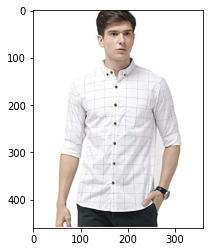

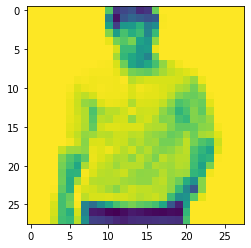

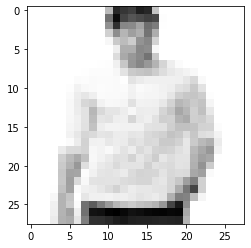

Predict:  Shirt


In [57]:
from PIL import Image

demo_image2 = "/content/drive/MyDrive/University/12th Semester/CSI 416 [Pattern Recognition Lab]/Project/raw_images/fashion/shirt_1.jpg"
img2 = Image.open(demo_image2)


plt.imshow(img2)
plt.show()

img2 = img2.resize((28, 28))
imgGray2 = img2.convert('L')
imgGray2.save('test_gray2.jpg')

plt.imshow(imgGray2)
plt.show()

image_array2 = np.array(imgGray2)

plt.imshow(imgGray2, cmap=plt.get_cmap('gray'))
plt.show()

image_array2 = image_array2/255

new_img2 = np.array(image_array2).reshape(1, 28, 28, 1)    # reshape for kerner operation

test_pred2 = model2.predict(new_img2)

label = np.argmax(test_pred2)

print("Predict: ", image_class[label])



> **Class Label**


```
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
```

In [58]:
print(len(test_pred2[0]))
for i in range(10):
    print(f"Similarity with {image_class[i]} is --> [{round(test_pred2[0][i]*100, 4)} %]")

10
Similarity with T-shirt/top is --> [6.7574 %]
Similarity with Trouser is --> [0.0305 %]
Similarity with Pullover is --> [0.5813 %]
Similarity with Dress is --> [0.0573 %]
Similarity with Coat is --> [0.5569 %]
Similarity with Sandal is --> [0.0393 %]
Similarity with Shirt is --> [86.3899 %]
Similarity with Sneaker is --> [0.0031 %]
Similarity with Bag is --> [5.5588 %]
Similarity with Ankle boot is --> [0.0254 %]


In [59]:
# history.history.keys()

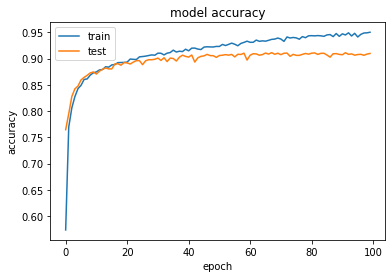

In [60]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


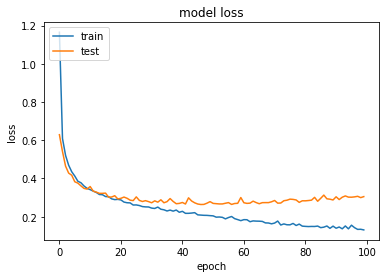

In [61]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()